# Exam 03: Summary

In [64]:
%matplotlib inline

In [65]:
import requests
import matplotlib.pyplot as plt

In [66]:
EXAM_URL = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/exam03.csv'

def load_data(url=EXAM_URL):
    ''' Loads CSV data from URL '''
    return [[float(d) for d in row.strip().split(',')] for row in requests.get(url).text.splitlines()]

In [67]:
SECTION_MAX = [6, 4, 6, 6, 6, 6, 6, 6, 6, 8]

def plot_sections(data):
    ''' Plot section percentages for given data '''
    section_labels  = ['Snippets', 'Unix', 'Compiling', 'Pointers', 'Data', 'Memory', 'Files', 'Processes', 'Networking', 'Programming']
    section_numbers = range(len(section_labels))
    section_data    = [[] for _ in section_labels]
    
    # Separate scores from each student into section lists and compute percentage
    for row in data:
        for index, section in enumerate(section_data):
            section.append(row[index] * 100.0 / SECTION_MAX[index])
    
    # Compute section averages
    section_averages = [sum(section) / len(section) for section in section_data]
        
    # Create bar graph of section averages
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.bar(section_numbers, section_averages, color='rgbcymk')
    plt.xticks(section_numbers, section_labels, rotation=90)
    plt.ylabel('Percentage')
    plt.xlabel('Section')

In [68]:
def plot_scores(data, score_max=sum(SECTION_MAX)):
    ''' Plot histograph of scores data '''
    
    # Compute score percentage
    scores = [sum(row) * 100.0 / score_max for row in data]

    # Construct histogram of scores
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    ax.hist(scores, bins=range(25, 105, 5), color='g')
    plt.grid(True)
    plt.ylabel('Number of Students')
    plt.xlabel('Percentage')

## Histograms

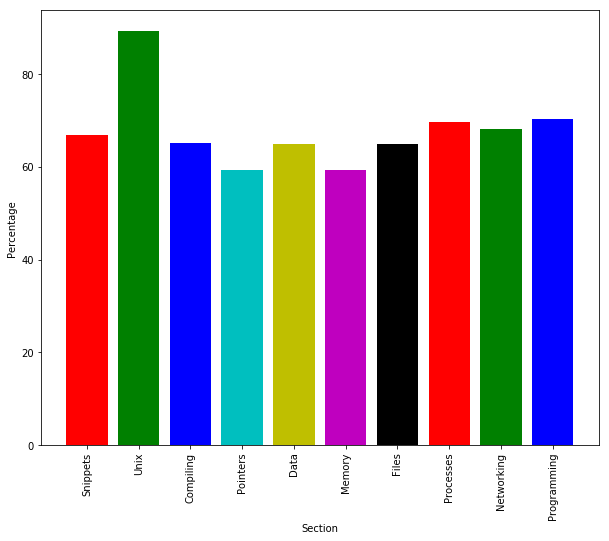

In [69]:
plot_sections(load_data())

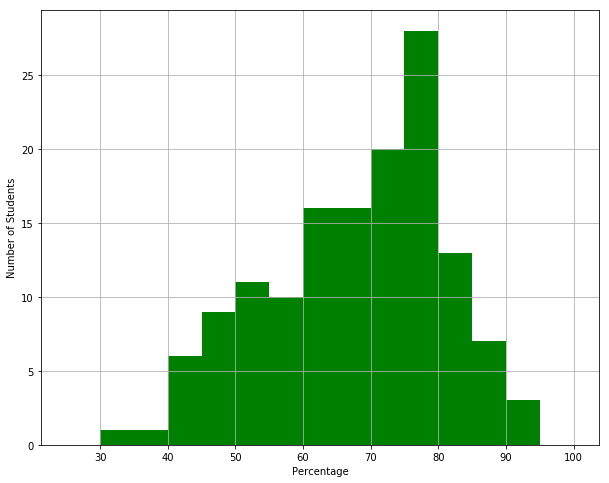

In [70]:
plot_scores(load_data())

In [71]:
scores = [sum(row) * 100.0 / sum(SECTION_MAX) for row in load_data()]
print('Minimum: {:.2f} %'.format(min(scores)))
print('Average: {:.2f} %'.format(sum(scores) / len(scores)))
print(' Median: {:.2f} %'.format(sorted(scores)[len(scores)//2]))
print('Maximum: {:.2f} %'.format(max(scores)))

Minimum: 23.33 %
Average: 67.22 %
 Median: 70.00 %
Maximum: 92.08 %
